In [ ]:
%matplotlib inline



Introduction to artifacts and artifact detection
================================================

Since MNE supports the data of many different acquisition systems, the
particular artifacts in your data might behave very differently from the
artifacts you can observe in our tutorials and examples.

Therefore you should be aware of the different approaches and of
the variability of artifact rejection (automatic/manual) procedures described
onwards. At the end consider always to visually inspect your data
after artifact rejection or correction.

Background: what is an artifact?
--------------------------------

Artifacts are signal interference that can be
endogenous (biological) and exogenous (environmental).
Typical biological artifacts are head movements, eye blinks
or eye movements, heart beats. The most common environmental
artifact is due to the power line, the so-called *line noise*.

How to handle artifacts?
------------------------

MNE deals with artifacts by first identifying them, and subsequently removing
them. Detection of artifacts can be done visually, or using automatic routines
(or a combination of both). After you know what the artifacts are, you need
remove them. This can be done by:

    - *ignoring* the piece of corrupted data
    - *fixing* the corrupted data

For the artifact detection the functions MNE provides depend on whether
your data is continuous (Raw) or epoch-based (Epochs) and depending on
whether your data is stored on disk or already in memory.

Detecting the artifacts without reading the complete data into memory allows
you to work with datasets that are too large to fit in memory all at once.
Detecting the artifacts in continuous data allows you to apply filters
(e.g. a band-pass filter to zoom in on the muscle artifacts on the temporal
channels) without having to worry about edge effects due to the filter
(i.e. filter ringing). Having the data in memory after segmenting/epoching is
however a very efficient way of browsing through the data which helps
in visualizing. So to conclude, there is not a single most optimal manner
to detect the artifacts: it just depends on the data properties and your
own preferences.

In this tutorial we show how to detect artifacts visually and automatically.
For how to correct artifacts by rejection see `tut_artifacts_reject`.
To discover how to correct certain artifacts by filtering see
`tut_artifacts_filter` and to learn how to correct artifacts
with subspace methods like SSP and ICA see `tut_artifacts_correct_ssp`
and `tut_artifacts_correct_ica`.


Artifacts Detection
-------------------

This tutorial discusses a couple of major artifacts that most analyses
have to deal with and demonstrates how to detect them.




In [1]:
import numpy as np

import mne
from mne.datasets import sample
from mne.preprocessing import create_ecg_epochs, create_eog_epochs

# getting some data ready
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'

raw = mne.io.read_raw_fif(raw_fname, preload=True)

Low frequency drifts and line noise



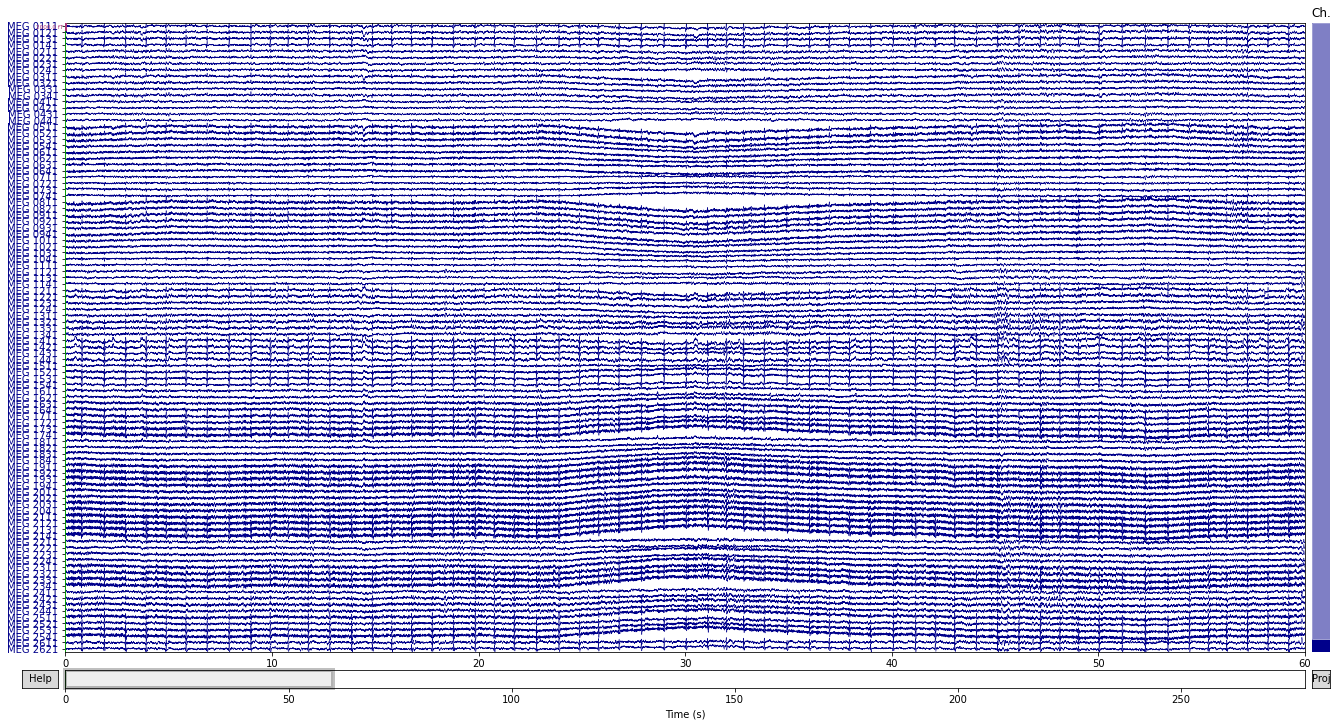

In [2]:
(raw.copy().pick_types(meg='mag')
           .del_proj(0)
           .plot(duration=60, n_channels=100, remove_dc=False));

we see high amplitude undulations in low frequencies, spanning across tens of
seconds



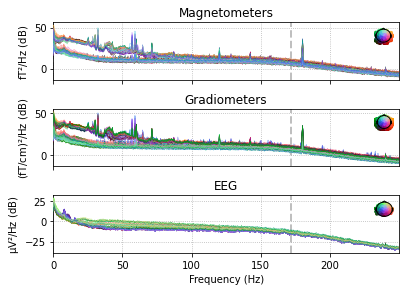

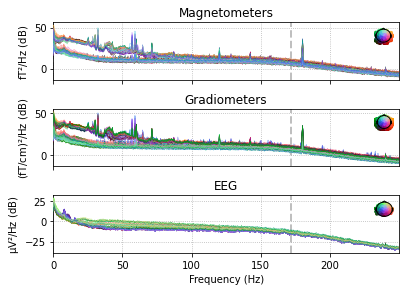

In [3]:
raw.plot_psd(tmax=np.inf, fmax=250)

On MEG sensors we see narrow frequency peaks at 60, 120, 180, 240 Hz,
related to line noise.
But also some high amplitude signals between 25 and 32 Hz, hinting at other
biological artifacts such as ECG. These can be most easily detected in the
time domain using MNE helper functions

See `tut_artifacts_filter`.



ECG
---

finds ECG events, creates epochs, averages and plots



We found 283 ECG events


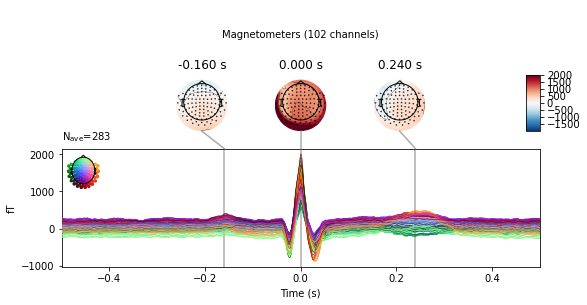

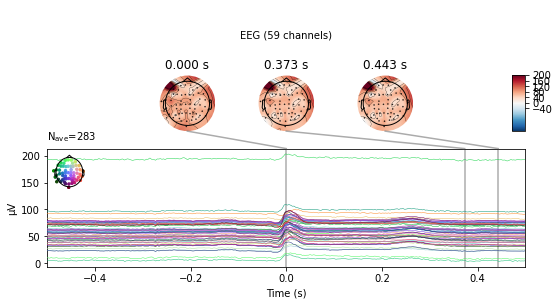

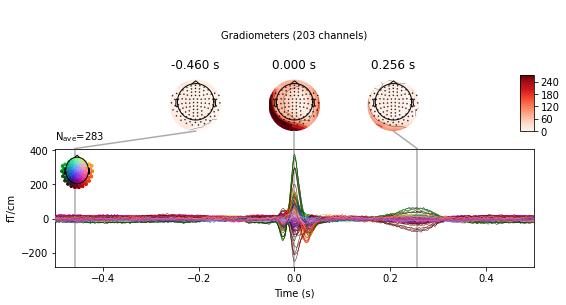

[<Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>]

In [4]:
average_ecg = create_ecg_epochs(raw).average()
print('We found %i ECG events' % average_ecg.nave)
average_ecg.plot_joint()

we can see typical time courses and non dipolar topographies
not the order of magnitude of the average artifact related signal and
compare this to what you observe for brain signals



EOG
---



We found 46 EOG events


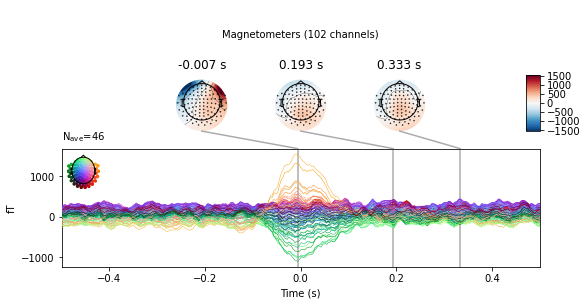

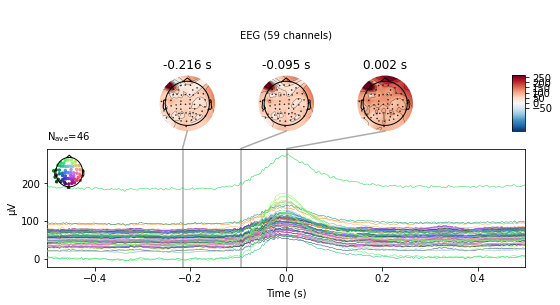

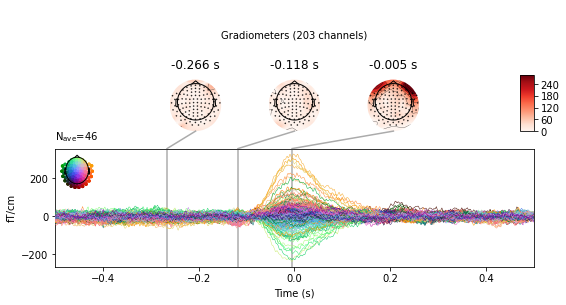

[<Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>]

In [5]:
average_eog = create_eog_epochs(raw).average()
print('We found %i EOG events' % average_eog.nave)
average_eog.plot_joint()

Knowing these artifact patterns is of paramount importance when
judging about the quality of artifact removal techniques such as SSP or ICA.
As a rule of thumb you need artifact amplitudes orders of magnitude higher
than your signal of interest and you need a few of such events in order
to find decompositions that allow you to estimate and remove patterns related
to artifacts.

Consider the following tutorials for correcting this class of artifacts:
    - `tut_artifacts_filter`
    - `tut_artifacts_correct_ica`
    - `tut_artifacts_correct_ssp`

